#Examples for nuclear hydrodynamics python code package

Here we use some examples to show how to use our nuclear hydrodynamics python code package.

## A simple beginning 

First, the main solver for each nucleus is the 'nuclei.py' code, you should import it before you do any calculation. The cell below show an example to import and initialize it, the default nucleus it simulate is for $^{238}U$, i.e., $N = 146, Z = 92$, we will show the customization for different nucleus and different NEDF parameters( in the paper ) in later sections.

In [1]:
import nuclei
p = nuclei.SphericalNuclearProblem(N=500, R=25.0, evolver_type='abm', form_factors=['n','p'])

superfluid/utils/fft.py:67: UserWarning: Could not import anfft... performance not optimal.
  warnings.warn("Could not import anfft... performance not optimal.")


Here N=500 is the lattice number (We use a 1D spherical symmetric lattice), R = 25.0 (fm) is the system size. 'evolver_type' is the method we use to do time-evolution for the wave-functions, which is Adam-Bashforth-Milner (ABM) 4th order predictor-corrector method for default. 'form_factors' is the charge distribution form factor for neutron and protons (for NEDF-0 in the paper, this will be set as form_factors = [ ]).

You can use the following codes to get the wave function, and the densities of neutron and protons. 

In [2]:
psi = nuclei.solve(p)

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


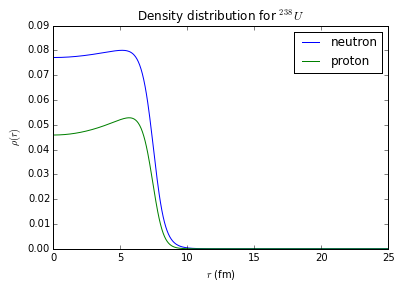

In [4]:
r = p.model.basis.xyz[0]
rho_n, rho_p = p.model.get_rhos(psi)
plot(r,rho_n, label='neutron')
plot(r,rho_p, label='proton')
xlabel('$r$ (fm)')
ylabel(r'$\rho(r)$')
title('Density distribution for $^{238}U$')
legend()

And the energy (its absolute value will be binding energy, MeV), rms charge radii (fm), neutron skin (fm):

In [11]:
En = p.model.get_energy(psi,t=0)
rc = p.model.get_rc_exact(psi)
nskin = p.model.get_neutron_skin(psi)
print En, rc, nskin

-1805.28782836 6.01279450028 0.0796722208853


## Customization

You can definitely change the type of nucleus and the parameters of our NEDFs in the following code, here we give a function:

In [23]:
def solve_sp(a_0=0.0, b_0=0.0, c_0=0.0,
             a_1=0.0, b_1=0.0, c_1=0.0,
             a_2=0.0, b_2=0.0, c_2=0.0,
             eta_t=0.0, delta=0.0, x=1.0,
             alpha=0.0,
             Nn=146, Np=92, p=p, psi0 = None, R=25.):
    p.functional_params.a_0 = a_0
    p.functional_params.b_0 = b_0
    p.functional_params.c_0 = c_0
    p.functional_params.a_1 = a_1
    p.functional_params.b_1 = b_1
    p.functional_params.c_1 = c_1
    p.functional_params.a_2 = a_2;
    p.functional_params.b_2 = b_2;
    p.functional_params.c_2 = c_2;
    p.functional_params.lam = eta_t
    p.functional_params.delta = delta;
    p.functional_params.alpha = alpha;
    p.functional_params.x = x;
    p.init()
    Aa = Nn + Np
    R = 4.00*Aa**(1./3.)
    p.R = R; p.init()
    p.model.Nn = Nn; p.model.Np = Np
    if psi0 is not None:
        psi0 = np.copy(psi0)
    for ntry in range(10):
        try:
            psi = nuclei.solve(p, psi0=psi0)
            break
        except ValueError:
            print("radii changes for solving psi")
            R += 1.0
            p.R = R; p.init()
            p.model.Nn = Nn; p.model.Np = Np

    #--get energy and radii--------------------
    energy = p.model.get_energy(psi,t=0)
    energy = abs(energy)
    rms_c = p.model.get_rc_exact(psi)
    nskin = p.model.get_neutron_skin(psi);
    return energy, psi, rms_c, R, nskin

Then you can get the solution for any nucleus with any parameters in the following way: (We use our NEDF-1 for Pb208 as an example)

In [21]:
energy, psi, rms_c, R, nskin = solve_sp(b_0 = -738.301703092, c_0 = 934.375547305, a_1 = 122.585233653, 
                                        b_1 = -127.96402741, eta_t = 0.474192583538, delta = 11.4716045194, 
                                        Nn = 126, Np = 82)

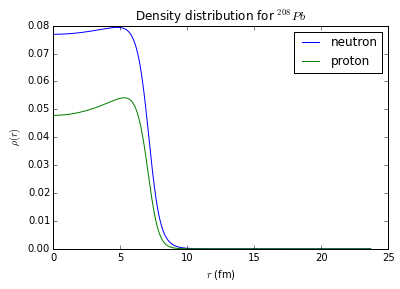

In [25]:
r = p.model.basis.xyz[0]
rho_n, rho_p = p.model.get_rhos(psi)
plot(r,rho_n, label='neutron')
plot(r,rho_p, label='proton')
xlabel('$r$ (fm)')
ylabel(r'$\rho(r)$')
title('Density distribution for $^{208}Pb$')
legend()